# **Get Dataset**

In [1]:
# obtaining the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p /content/data
!unzip /content/drive/MyDrive/OMAPS_dataset/OMAPS2.zip -d /content/data

Archive:  /content/drive/MyDrive/OMAPS_dataset/OMAPS2.zip
   creating: /content/data/OMAPS2/aligned_audio_align_221225/
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_02.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_03.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_04.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_05.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_02.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_03.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_04.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_05.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/03_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/03_02.txt  
  in

In [3]:
!ls /content/data/OMAPS2/

aligned_audio_align_221225  aligned_video_align_221225	test  train  valid


In [4]:
!ls /content/data/OMAPS2/train/

video  wav


In [5]:
!ls /content/data/OMAPS2/train/wav

01_05.wav  08_02.wav  14_01.wav  19_03.wav	  yty20_2x8_7.wav  yty22_1x5_1.wav  yty26_3x5_1.wav
02_01.wav  08_03.wav  14_02.wav  19_04.wav	  yty20_3x8_1.wav  yty22_1x5_2.wav  yty26_3x5_3.wav
02_02.wav  08_04.wav  14_03.wav  19_05.wav	  yty20_3x8_4.wav  yty22_2x5_1.wav  yty26_3x5_5.wav
02_03.wav  09_01.wav  14_04.wav  20_01.wav	  yty20_3x8_5.wav  yty22_2x5_2.wav  yty3_1.wav
02_04.wav  09_02.wav  14_05.wav  20_02.wav	  yty20_3x8_7.wav  yty22_2x5_5.wav  yty3_2.wav
02_05.wav  09_04.wav  15_01.wav  20_03.wav	  yty20_4x7_3.wav  yty2_2.wav	    yty3_4.wav
03_02.wav  09_06.wav  15_02.wav  20_04.wav	  yty20_4x7_4.wav  yty2_4.wav	    yty3_5.wav
03_04.wav  10_01.wav  15_03.wav  20_05.wav	  yty20_4x7_5.wav  yty2_5.wav	    yty4_1.wav
03_05.wav  10_04.wav  15_05.wav  playing2.wav	  yty20_4x7_6.wav  yty26_1x7_1.wav  yty4_2.wav
04_01.wav  11_01.wav  16_01.wav  playing3.wav	  yty20_4x7_7.wav  yty26_1x7_2.wav  yty4_3.wav
04_02.wav  11_03.wav  16_02.wav  yty1_2.wav	  yty20_5x7_1.wav  yty26_1x7_3.wav  yty4_

In [6]:
import os
from scipy.io import wavfile
import numpy as np
import librosa

In [7]:
folder_path_train = "/content/data/OMAPS2/train/wav/"
files_train = os.listdir(folder_path_train)

print(files_train)

folder_path_val = "/content/data/OMAPS2/valid/wav/"
files_val = os.listdir(folder_path_val)

print(files_val)

folder_path_test = "/content/data/OMAPS2/test/wav/"
files_test = os.listdir(folder_path_test)

print(files_test)

['yty20_3x8_7.wav', '15_02.wav', '15_05.wav', 'yty26_3x5_3.wav', 'yty5_4.wav', 'yty5_1.wav', 'yty20_5x7_2.wav', '06_03.wav', 'yty20_1x7_4.wav', 'yty3_5.wav', '14_03.wav', 'yty1_4.wav', '12_05.wav', 'yty20_4x7_5.wav', 'yty22_1x5_1.wav', 'yty20_5x7_1.wav', '20_04.wav', '06_04.wav', '02_03.wav', '19_05.wav', '13_01.wav', '09_01.wav', 'yty26_2x8_5.wav', 'yty5_2.wav', 'yty26_1x7_3.wav', '19_04.wav', '12_02.wav', 'yty26_2x8_1.wav', '10_04.wav', 'yty26_2x8_7.wav', '10_01.wav', '09_02.wav', '15_01.wav', 'yty5_5.wav', '20_02.wav', '18_02.wav', '19_01.wav', '19_02.wav', '09_04.wav', '19_03.wav', '16_05.wav', 'yty3_1.wav', '03_05.wav', 'yty22_1x5_2.wav', '15_03.wav', '07_03.wav', 'yty2_4.wav', 'yty4_1.wav', 'yty20_2x8_7.wav', '08_03.wav', 'yty26_1x7_6.wav', 'zyn3.wav', 'yty26_1x7_2.wav', 'yty3_4.wav', 'yty1_2.wav', 'yty26_1x7_5.wav', '08_02.wav', 'zyn1.wav', '06_05.wav', 'yty20_3x8_4.wav', 'zyn2.wav', '13_02.wav', 'yty26_2x8_2.wav', 'yty26_3x5_1.wav', 'yty4_5.wav', 'yty26_2x8_4.wav', '14_01.wav',

# **Preprocessing**

In [8]:
# Constants for processing parameters
HOP_LENGTH = 512
N_BINS = 252
BINS_PER_OCTAVE = 36
NUM_NOTES = 88
MAX_SAMPLES_PER_FILE = 4000000

# Training, validation, and test sets
train_features, train_labels = [], []
val_features, val_labels = [], []
test_features, test_labels = [], []
train_count = 0
val_count = 0
test_count = 0

def preprocess(files, feature_storage, label_storage, count, folder_path):
    """
    Processes a list of audio files, extracts their CQT features, aligns them with ground truth labels,
    and stores them in feature and label storage lists.

    Args:
        files (list): List of file names to process.
        feature_storage (list): The list to store CQT features.
        label_storage (list): The list to store label matrices.
        count (int): Counter to keep track of the number of files processed.
        folder_path (str): Path to the folder containing the audio files.

    Returns:
        int: The updated count of processed files.
    """
    for filename in files:
        # Load audio file and calculate window length
        sampling_freq, stereo_vector = wavfile.read(folder_path + filename)
        window_length = HOP_LENGTH / float(sampling_freq)

        # Convert audio to float type and extract CQT features
        float_array = stereo_vector / 1.0
        cqt_features = np.abs(librosa.cqt(float_array, sr=sampling_freq, hop_length=HOP_LENGTH, n_bins=N_BINS, bins_per_octave=BINS_PER_OCTAVE)).T

        # Determine the number of frames and create a time vector
        num_frames = cqt_features.shape[0]
        time_vector = np.arange(1, num_frames + 1) * window_length

        # Initialize binary label matrix with dimensions (frames, notes)
        labels = np.zeros((num_frames, NUM_NOTES))

        # Read and process aligned labels from the corresponding text file
        folder_path_label = "/content/data/OMAPS2/aligned_audio_align_221225/"
        label_file_path = os.path.join(folder_path_label, f"{filename.split('.')[0]}.txt")
        with open(label_file_path, "r") as file:
          lines = file.read().split("\n")

        for line in lines:
            if line.strip():
                start, end, pitch, velocity = map(float, line.split('\t')[:4])
                pitch = int(pitch) - 21  # Adjust pitch to the 0-87 range
                start_idx = np.where(time_vector >= start)[0]
                end_idx = np.where(time_vector > end)[0]

                if start_idx.size and end_idx.size:
                    labels[start_idx[0]:end_idx[0], pitch] = 1

        # Ensure files don't exceed the maximum allowed samples per file
        while (len(feature_storage) + len(cqt_features)) >= MAX_SAMPLES_PER_FILE:
            to_add = MAX_SAMPLES_PER_FILE - len(feature_storage)
            feature_storage.extend(cqt_features[:to_add, :])
            label_storage.extend(labels[:to_add, :])

            feature_storage_np = np.array(feature_storage)
            label_storage_np = np.array(label_storage)

            count += 1
            feature_storage = []
            label_storage = []
            cqt_features = cqt_features[to_add:, :]
            labels = labels[to_add:, :]

        # Add remaining CQT features and labels if less than the max allowed
        if len(cqt_features) == MAX_SAMPLES_PER_FILE:
            feature_storage.extend(cqt_features)
            label_storage.extend(labels)
            feature_storage_np = np.array(feature_storage)
            label_storage_np = np.array(label_storage)

            count += 1
            feature_storage = []
            label_storage = []
        elif len(cqt_features) > 0:
            feature_storage.extend(cqt_features)
            label_storage.extend(labels)

    return count


In [9]:
train_count = preprocess(files_train, train_features, train_labels, train_count, folder_path_train)
test_count = preprocess(files_test, test_features, test_labels, test_count, folder_path_test)
val_count = preprocess(files_val, val_features, val_labels, val_count, folder_path_val)

In [10]:
print(len(train_features), len(train_labels))
print(len(test_features), len(test_labels))
print(len(val_features), len(val_labels))

533087 533087
140661 140661
83243 83243


# Normalization

In [11]:
# Get the minimum and maximum values from the X values in the training set
max_train = max(max(val) for val in train_features)
min_train = min(min(val) for val in train_features)
min_train, max_train

(3.245034542981351e-05, 796850.8240814671)

In [12]:
# Normalize each X value in the training set for every single frame (but this one hasnt taken into account the mean)
initial_norm_train_features = [[(x - min_train) / (max_train - min_train) for x in inner_list] for inner_list in train_features]

In [13]:
# Calculate the mean of the normalized values
flattened_normalized_X_train = [value for sublist in initial_norm_train_features for value in sublist]
train_mean = sum(flattened_normalized_X_train) / len(flattened_normalized_X_train)

In [14]:
train_mean

0.0023727251011984338

In [15]:
# Normalize each X value in the training set for every single frame
norm_train_X = [[value - train_mean for value in sublist] for sublist in initial_norm_train_features]

# Normalize each X value in the validation set for every single frame
norm_val_X = [[value - train_mean for value in sublist] for sublist in val_features]

# Normalize each X value in the test set for every single frame
norm_test_X = [[value - train_mean for value in sublist] for sublist in test_features]


In [16]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_train = max(max(val) for val in norm_train_X)
min_train_norm_train = min(min(val) for val in norm_train_X)
min_train_norm_train, max_train_norm_train

(-0.0023727251011984338, 0.9976272748988015)

In [17]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_val = max(max(val) for val in norm_val_X)
min_train_norm_val = min(min(val) for val in norm_val_X)
max_train_norm_val, min_train_norm_val

(342831.61232856975, -0.0017180658786782243)

In [18]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_test = max(max(val) for val in norm_test_X)
min_train_norm_test = min(min(val) for val in norm_test_X)
max_train_norm_test, min_train_norm_test

(360672.3976635917, -0.0016798117334346535)

#LSTM

In [20]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.7 MB/s eta 0:00:00


In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import History, ModelCheckpoint, EarlyStopping
from tensorflow_addons.optimizers import CyclicalLearningRate
from keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt

# Global variables
size_samples = 100
input_size = 252
number_units = 256
number_classes = 88
mini_batch_size = 1500
num_epochs = 50

# Prepare training and validation datasets
def reshape_sequences(X, y):
    """Reshape input data to fixed-size sequences for LSTM input."""
    max_shape_X = (X.shape[0] // size_samples) * size_samples
    X = np.reshape(X[0:max_shape_X, :], (X.shape[0] // size_samples, size_samples, X.shape[1]))
    max_shape_y = (y.shape[0] // size_samples) * size_samples
    y = np.reshape(y[0:max_shape_y, :], (y.shape[0] // size_samples, size_samples, number_classes))
    return X, y

# Function to plot training results
def plot_training(history, title):
    """Plot training/validation accuracy and loss over epochs."""
    plt.figure(figsize=(10, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title}: Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title}: Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to build and compile the LSTM model
def build_lstm_model(input_size, size_samples, num_layers, num_units, num_classes):
    """Build and compile an LSTM model."""
    model = Sequential()
    model.add(LSTM(num_units, input_shape=(size_samples, input_size), return_sequences=True, activation='tanh'))
    model.add(Dropout(0.05))

    for i in range(1, num_layers):
        model.add(LSTM(num_units, return_sequences=True, activation='tanh'))
        model.add(Dropout(0.05))

    for i in range(num_layers):
        print(f"Adding Dense layer {i + 1} of {num_units} units")
        model.add(Dense(num_units, activation='relu', trainable=False))
        model.add(Dropout(0.05))

    print(f"Adding classification layer of {num_classes} units")
    model.add(Dense(num_classes, activation='sigmoid', trainable=False))

    # Configure cyclical learning rate and optimizer
    clr_schedule = CyclicalLearningRate(
        initial_learning_rate=1e-4,
        maximal_learning_rate=0.1,
        step_size=1000,
        scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
        scale_mode='cycle'
    )
    optimizer = Adam(learning_rate=clr_schedule)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Function to train and evaluate the LSTM model
def train_and_evaluate_lstm(model_num, num_layers, model, X_train, y_train, X_val, y_val):
    """Train the LSTM model and evaluate performance."""
    print(f"Training LSTM Model {model_num} with {num_layers} layers...")
    history = History()

    # Configure model checkpoints and early stopping
    checkpoint_path = f'/content/checkpoints/weights_{num_layers}_layers_lstm_model_{model_num}.hdf5'
    checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')

    # Train the model
    history = model.fit(
        X_train, y_train, batch_size=mini_batch_size, epochs=num_epochs,
        validation_data=(X_val, y_val), verbose=1,
        callbacks=[checkpointer, early_stopping]
    )

    # Plot training history
    plot_training(history, f'LSTM Model {model_num}')
    model.load_weights(checkpoint_path)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    clear_session()

Adding Dense layer 1 of 256 units
Adding Dense layer 2 of 256 units
Adding Dense layer 3 of 256 units
Adding classification layer of 88 units
Training LSTM Model 1 with 3 layers...
Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.0106
Epoch 1: val_loss improved from inf to 0.69416, saving model to /content/checkpoints/weights_3_layers_lstm_model_1.hdf5
4/4 [==============================] - 7s 603ms/step - loss: 0.6931 - accuracy: 0.0106 - val_loss: 0.6942 - val_accuracy: 0.0137
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.0127
Epoch 2: val_loss improved from 0.69416 to 0.68831, saving model to /content/checkpoints/weights_3_layers_lstm_model_1.hdf5
4/4 [==============================] - 1s 148ms/step - loss: 0.6923 - accuracy: 0.0127 - val_loss: 0.6883 - val_accuracy: 0.0127
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.0078
Epoch 3: val_loss improved from 0.68831 t

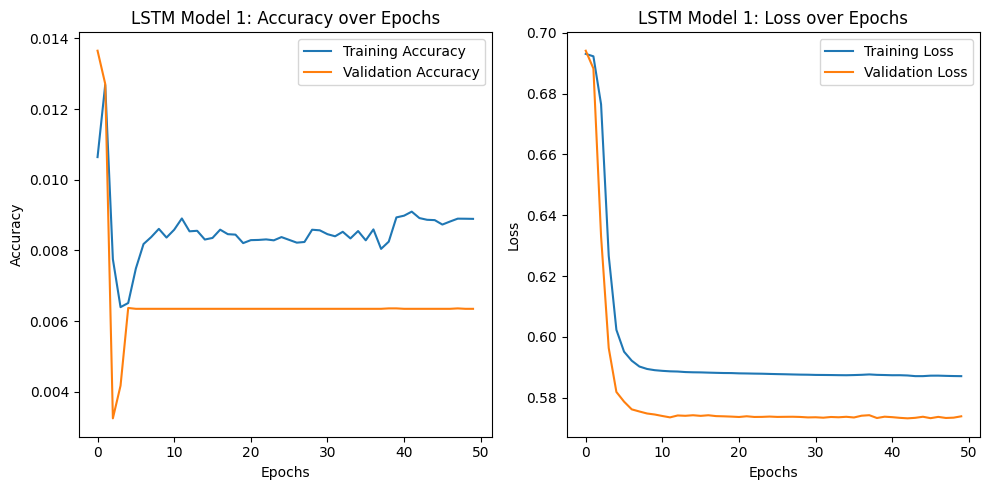

In [26]:
# Reshape Data, Built LSTM, Train LSTM
X_train, y_train = reshape_sequences(np.array(norm_train_X), np.array(train_labels))
X_val, y_val = reshape_sequences(np.array(norm_val_X), np.array(val_labels))
num_layers = 3
model_num = 1
lstm_model = build_lstm_model(input_size, size_samples, num_layers, number_units, number_classes)
train_and_evaluate_lstm(model_num, num_layers, lstm_model, X_train, y_train, X_val, y_val)

In [42]:
#Build LSTM
model = Sequential()
model.add(LSTM(number_units, input_shape=(size_samples, input_size), return_sequences=True, activation='tanh', name='lstm_1'))
model.add(Dropout(0.05, name='dropout_1'))
model.add(LSTM(number_units, return_sequences=True, activation='tanh', name='lstm_2'))
model.add(Dropout(0.05, name='dropout_2'))
model.add(Dense(256, activation='relu', trainable=False, name='dense_1'))
model.add(Dropout(0.05, name='dropout_3'))
model.add(Dense(number_units, activation='relu', trainable=False, name='dense_2'))
model.add(Dropout(0.05, name='dropout_4'))
model.add(Dense(number_classes, activation='sigmoid', trainable=False, name='classification'))

In [43]:
# Test Model
X_test = np.array(norm_test_X)
y_test = np.array(test_labels)
X_test_reshaped, y_test_reshaped = reshape_sequences(X_test, y_test)

# Transfer Learning
model.load_weights('weights_3_layers_model_3_tuned.hdf5', by_name=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Make predictions using the reshaped test data
predictions = lstm_model.predict(X_test_reshaped).round()

# Reshape predictions and test labels to the appropriate dimensions for evaluation
predictions = np.reshape(predictions, (y_test_reshaped.shape[0] * y_test_reshaped.shape[1], y_test_reshaped.shape[2]))
y_test_reshaped = np.reshape(y_test_reshaped, (y_test_reshaped.shape[0] * y_test_reshaped.shape[1], y_test_reshaped.shape[2]))

44/44 [==============================] - 1s 7ms/step


In [45]:
TP = np.count_nonzero(np.logical_and(predictions == 1, y_test_reshaped == 1))
FN = np.count_nonzero(np.logical_and(predictions == 0, y_test_reshaped == 1))
FP = np.count_nonzero(np.logical_and(predictions == 1, y_test_reshaped == 0))
recall = TP / float(TP + FN)
precision = TP / float(TP + FP)
accuracy = TP / float(TP + FP + FN)
F1_Score = 100 * 2 * precision * recall / (precision + recall)

print(f"TP: {TP}")
print(f"FN: {FN}")
print(f"FP: {FP}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {F1_Score}")

TP: 108355
FN: 141309
FP: 5930997
Recall: 0.4340033004357857
Precision: 0.017941494385490364
Accuracy: 0.017531296409882373
F1 Score: 3.4458490803648774


#JUNK

Loading Training Data
Adding 1st Dense layer of 256 units
Adding 2nd Dense layer of 256 units
Adding classification layer of 88 units
Epoch 1/50
163/167 [============================>.] - ETA: 0s - loss: 0.6158 - accuracy: 0.0123
Epoch 1: saving model to /content/checkpointsweights.hdf5
167/167 [==============================] - 6s 20ms/step - loss: 0.6156 - accuracy: 0.0122 - val_loss: 0.6027 - val_accuracy: 0.0106
Epoch 2/50
 11/167 [>.............................] - ETA: 1s - loss: 0.6071 - accuracy: 0.0104

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:403: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:     scale_fn=lambda x: 1/(2.0**(x-1)),

  return {key: serialize_keras_object(value) for key, value in obj.items()}


165/167 [============================>.] - ETA: 0s - loss: 0.6060 - accuracy: 0.0111
Epoch 2: saving model to /content/checkpointsweights.hdf5
167/167 [==============================] - 2s 13ms/step - loss: 0.6059 - accuracy: 0.0111 - val_loss: 0.5987 - val_accuracy: 0.0106
Epoch 3/50
167/167 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.0120
Epoch 3: saving model to /content/checkpointsweights.hdf5
167/167 [==============================] - 2s 14ms/step - loss: 0.6020 - accuracy: 0.0120 - val_loss: 0.5977 - val_accuracy: 0.0106
Epoch 4/50
166/167 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.0122
Epoch 4: saving model to /content/checkpointsweights.hdf5
167/167 [==============================] - 2s 14ms/step - loss: 0.6020 - accuracy: 0.0122 - val_loss: 0.5969 - val_accuracy: 0.0106
Epoch 5/50
167/167 [==============================] - ETA: 0s - loss: 0.6018 - accuracy: 0.0118
Epoch 5: saving model to /content/checkpointsweights.hdf5

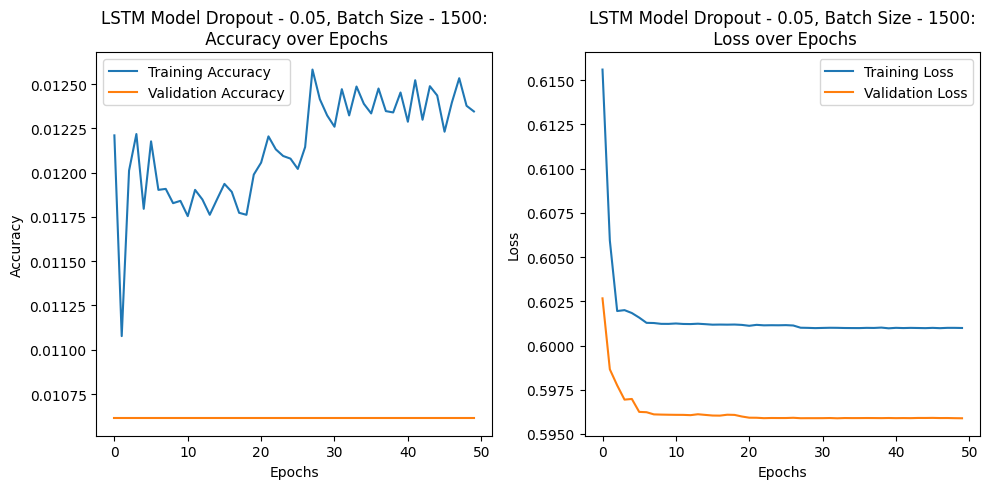

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Activation, Masking
from keras.regularizers import l2
from keras import callbacks
from keras.callbacks import History, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt

def plot_training(history):
    """Plot training/validation accuracy and loss over epochs."""
    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'LSTM Model Dropout - 0.05, Batch Size - 1500:\n Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'LSTM Model Dropout - 0.05, Batch Size - 1500:\n Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

mini_batch_size, num_epochs = 1500, 50
input_size = 252
number_units = 256
number_layers =3
number_classes = 88
best_accuracy = 0
size_samples = 100

X_val = np.array(norm_train2mat_val) # CQT Features
max_shape = (X_val.shape[0]//size_samples)*size_samples
X_val = np.array(np.reshape(X_val[0:max_shape,:],(X_val.shape[0]//size_samples,size_samples,X_val.shape[1])))

y_val = np.array(labels2mat_val) # Label Target Variables
max_shape = (y_val.shape[0]//size_samples)*size_samples
y_val = np.reshape(y_val[0:max_shape,:],(y_val.shape[0]//size_samples,size_samples,y_val.shape[1]))

print('Loading Training Data')
X_train = np.array(norm_train2mat_train)
max_shape = (X_train.shape[0]//size_samples)*size_samples
X_train = np.reshape(X_train[0:max_shape,:],(X_train.shape[0]//size_samples,size_samples,input_size))

y_train = np.array(labels2mat_train)
max_shape = (y_train.shape[0]//size_samples)*size_samples
y_train = np.array(np.reshape(y_train[0:max_shape,:],(y_train.shape[0]//size_samples,size_samples,number_classes)))

previous_model_weights = 'weights_3_layers_model_3.hdf5'
model = Sequential()
model.add(LSTM(number_units, input_shape=(size_samples, input_size), return_sequences=True, activation='tanh'))
model.add(Dropout(0.05))
model.add(LSTM(number_units, return_sequences=True, activation='tanh'))
model.add(Dropout(0.05))
print(f"Adding 1st Dense layer of {number_units} units")
model.add(Dense(input_size, kernel_initializer='normal', activation='relu', trainable=False))
model.add(Dropout(0.05))

print(f"Adding 2nd Dense layer of {number_units} units")
model.add(Dense(number_units, kernel_initializer='normal', activation='relu', trainable=False))
model.add(Dropout(0.05))

print(f"Adding classification layer of {number_classes} units")
model.add(Dense(number_classes, kernel_initializer='normal', activation='sigmoid', trainable=False))

# Load weights into the Dense layers by name
model.load_weights(previous_model_weights, by_name=True)

# Compile the model
from tensorflow_addons.optimizers import CyclicalLearningRate

clr_schedule = CyclicalLearningRate(
    initial_learning_rate=1e-4,
    maximal_learning_rate=0.1,
    step_size=1000,
    scale_fn=lambda x: 1/(2.0**(x-1)),
    scale_mode='cycle'
)
optimizer = keras.optimizers.Adam(learning_rate=clr_schedule)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath= "/content/checkpoints" + "weights.hdf5", verbose=1, save_best_only=False)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')

training_log = open("/content/checkpoints" + "Training.log", "w")

save = model.fit(X_train, y_train,epochs = num_epochs,verbose=1,validation_data=(X_val, y_val), callbacks=[checkpointer,early])
plot_training(save)
training_log.write(str(save.history) + "\n")
training_log.close()


In [ ]:
#model = load_model("/content/checkpoints" + "chweights.hdf5")
# model = load_model("/content/checkpointsweights.hdf5")
model.load_weights('/content/checkpointsweights.hdf5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.load_weights('/content/weights.hdf5')
TP = 0
FP = 0
FN = 0

In [ ]:
X_test = np.array(norm_train2mat_test)
y_test = np.array(labels2mat_test)
max_shape = (X_test.shape[0]//size_samples)*size_samples
X_test = np.reshape(X_test[0:max_shape,:],(X_test.shape[0]//size_samples,size_samples,input_size))
y_test = np.reshape(y_test[0:max_shape,:],(y_test.shape[0]//size_samples,size_samples,number_classes))


In [ ]:
# predictions = model.predict(X_test, batch_size=mini_batch_size, verbose = 1)
predictions = model.predict(X_test).round()
predictions = np.reshape(predictions,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))

y_test= np.reshape(y_test,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
# predictions = np.array(predictions).round()
# predictions[predictions > 1] = 1

# predictions = np.reshape(predictions,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
# y_test = np.reshape(y_test,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
# predictions = np.array(predictions).round()
# predictions[predictions > 1] = 1
# np.save('{}predictions'.format("/content/checkpoints"), predictions)
print(predictions)

44/44 [==============================] - 1s 7ms/step
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
# for a in range(predictions.shape[1]):
#     for j in range(2,predictions.shape[0]-3):
#         if predictions[j-1,a] == 1 and predictions[j,a] == 0 and predictions[j+1,a] == 0 and predictions[j+2,a] == 1:
#             predictions[j,a] = 1
#             predictions[j+1,a] = 1
#         if predictions[j-2,a] == 0 and predictions[j-1,a] == 0 and predictions[j,a] == 1 and predictions[j+1,a] == 1 and predictions[j+2,a] == 0 and predictions[j+3,a] == 0:
#             predictions[j,a] = 0
#             predictions[j+1,a] = 0
#         if predictions[j-1,a] == 0 and predictions[j,a] == 1 and predictions[j+1,a] == 0 and predictions[j+2,a] == 0:
#             predictions[j,a] = 0
#         if predictions[j-1,a] == 1 and predictions[j,a] == 0 and predictions[j+1,a] == 1 and predictions[j+2,a] == 1:
#             predictions[j,a] = 1

print("Calculating accuracy after cleaning. . .")
TP = np.count_nonzero(np.logical_and( predictions == 1, y_test == 1 ))
FN = np.count_nonzero(np.logical_and( predictions == 0, y_test == 1 ))
FP = np.count_nonzero(np.logical_and( predictions == 1, y_test == 0 ))
if (TP + FN) > 0:
    R = TP/float(TP + FN)
    P = TP/float(TP + FP)
    A = 100*TP/float(TP + FP + FN)
    if P == 0 and R == 0:
      F = 0
    else:
      F = 100*2*P*R/(P + R)
else:
    A = 0
    F = 0
    R = 0
    P = 0

print('\n F-measure post-processed: ')
print(F)
print('\n Accuracy post-processed: ')
print(A)

Calculating accuracy after cleaning. . .

 F-measure post-processed: 
5.229098602831696

 Accuracy post-processed: 
2.6847432369626643


In [ ]:
print('\n F-measure: ')
print(F)
print('\n Custom Accuracy: ')
print(A)
print("Recall", R)
print("Precision", P)


 F-measure: 
4.077925770023947

 Custom Accuracy: 
2.0814018971834796
Recall 0.2795461064245272
Precision 0.02199382168580246


In [ ]:
'''###### TRAIN 1: DNN - 3 layers - 150 unis per layer ######'''

import numpy as np
import os
import os.path
import sys

# We need to set the random seed so that we get ther same results with the same parameters
np.random.seed(400)

# Import keras main libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Activation, Masking
from keras.regularizers import l2
from keras import callbacks
from keras.callbacks import History, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras.optimizers import Adam
import keras

In [ ]:
!pip install tensorflow_addons

In [ ]:
from tensorflow_addons.optimizers import CyclicalLearningRate

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def custom_metric(y_true, y_pred):
    # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
    TP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 1)), dtype=tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 1)), dtype=tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 0)), dtype=tf.float32))

    # Calculate the custom metric
    custom_metric_value = TP / tf.cast(TP + FP + FN, dtype=tf.float32)

    return custom_metric_value

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
mini_batch_size, num_epochs = 100, 10
input_size = 252
number_units = 256
number_layers =3
number_classes = 88
best_accuracy = 0
size_samples = 100

model = Sequential()
history = History()

X_val = np.array(norm_train2mat_val) # CQT Features
max_shape = (X_val.shape[0]//size_samples)*size_samples
X_val = np.array(np.reshape(X_val[0:max_shape,:],(X_val.shape[0]//size_samples,size_samples,X_val.shape[1])))

y_val = np.array(labels2mat_val) # Label Target Variables
max_shape = (y_val.shape[0]//size_samples)*size_samples
y_val = np.reshape(y_val[0:max_shape,:],(y_val.shape[0]//size_samples,size_samples,y_val.shape[1]))

print('Loading Training Data')
X_train = np.array(norm_train2mat_train)
max_shape = (X_train.shape[0]//size_samples)*size_samples
X_train = np.reshape(X_train[0:max_shape,:],(X_train.shape[0]//size_samples,size_samples,input_size))

y_train = np.array(labels2mat_train)
max_shape = (y_train.shape[0]//size_samples)*size_samples
y_train = np.array(np.reshape(y_train[0:max_shape,:],(y_train.shape[0]//size_samples,size_samples,number_classes)))

# Count the number of files in the training folder
num_tr_batches = len(X_train)/2

model.add(LSTM(number_units, input_shape=(size_samples, input_size),return_sequences = "True",kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dropout(0.2))
for i in range(number_layers - 1):
    print("Adding {} units".format(str(i + 2) + "layer of" + str(number_units)))
    model.add(LSTM(number_units,return_sequences = "True",kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.2))

print(" Adding classification layer")
model.add(Dense(number_classes, kernel_initializer='normal', activation='relu'))


clr_schedule = CyclicalLearningRate(
    initial_learning_rate=1e-4,
    maximal_learning_rate=0.1,
    step_size=1000,
    scale_fn=lambda x: 1/(2.0**(x - 1)),
    scale_mode='cycle'
)
optimizer = keras.optimizers.Adam(learning_rate=clr_schedule, clipnorm=1.0)
# optimizer = keras.optimizers.Adam(learning_rate=clr_schedule, clipnorm=1.0)

# optimizer = Adam(learning_rate=0.1)
# optimizer = Adam(learning_rate=0.1, clipnorm=1.0)
'''
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',
                                       tf.keras.metrics.Precision(),
                                       tf.keras.metrics.Recall(),
                                       custom_metric])
'''
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

checkpointer = ModelCheckpoint(filepath= "/content/checkpoints" + "weights.hdf5", verbose=1, save_best_only=False)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')

training_log = open("/content/checkpoints" + "Training.log", "w")

save = model.fit(X_train, y_train,epochs = num_epochs,verbose=1,validation_data=(X_val, y_val), callbacks=[checkpointer,early])
training_log.write(str(save.history) + "\n")
training_log.close()

Loading Training Data
Adding 2layer of256 units
Adding 3layer of256 units
 Adding classification layer
Epoch 1/10


KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 100, 256)          521216    
                                                                 
 dropout_57 (Dropout)        (None, 100, 256)          0         
                                                                 
 lstm_60 (LSTM)              (None, 100, 256)          525312    
                                                                 
 dropout_58 (Dropout)        (None, 100, 256)          0         
                                                                 
 lstm_61 (LSTM)              (None, 100, 256)          525312    
                                                                 
 dropout_59 (Dropout)        (None, 100, 256)          0         
                                                                 
 dense_20 (Dense)            (None, 100, 88)         

In [ ]:
from keras.models import Sequential, load_model

In [ ]:
#model = load_model("/content/checkpoints" + "chweights.hdf5")
# model = load_model("/content/checkpointsweights.hdf5")
model.load_weights('/content/checkpointsweights.hdf5')
# model.load_weights('/content/weights.hdf5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
TP = 0
FP = 0
FN = 0

In [ ]:
#X_test = np.array(train2mat_test)

In [ ]:
X_test = np.array(norm_train2mat_test)
y_test = np.array(labels2mat_test)
max_shape = (X_test.shape[0]//size_samples)*size_samples
X_test = np.reshape(X_test[0:max_shape,:],(X_test.shape[0]//size_samples,size_samples,input_size))
y_test = np.reshape(y_test[0:max_shape,:],(y_test.shape[0]//size_samples,size_samples,number_classes))


In [ ]:
# predictions = model.predict(X_test, batch_size=mini_batch_size, verbose = 1)
predictions = model.predict(X_test)

# predictions = np.reshape(predictions,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
# y_test = np.reshape(y_test,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
# predictions = np.array(predictions).round()
# predictions[predictions > 1] = 1
# np.save('{}predictions'.format("/content/checkpoints"), predictions)
print(predictions)

15/15 [==============================] - 1s 10ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
TP = np.count_nonzero(np.logical_and( predictions.round() == 1, y_test == 1 ))
FN = np.count_nonzero(np.logical_and( predictions.round() == 0, y_test == 1 ))
FP = np.count_nonzero(np.logical_and( predictions.round() == 1, y_test == 0 ))
print(TP)
print(FN)
print(FP)
if (TP + FN) > 0:
    R = TP/float(TP + FN)
    P = TP/float(TP + FP)
    A = TP/float(TP + FP + FN)
    if P == 0 and R == 0:
      F = 0
    else:
	    F = 100*2*P*R/(P + R)
else:
    A = 0
    F = 0
    R = 0
    P = 0

0
254509
0


ZeroDivisionError: float division by zero

In [ ]:
print('\n F-measure: ')
print(F)
print('\n Custom Accuracy: ')
print(A)
print("Recall", R)
print("Precision", P)


 F-measure: 
22.584082836325774

 Custom Accuracy: 
0.1272945697171632
Recall 0.598677864266506
Precision 0.13917018129631256


In [ ]:
print(TP)
print(FN)
print(FP)

In [ ]:
print(TP)
print(len(predictions))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(save.history['loss'], label='training_loss')
plt.plot(save.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [ ]:
plt.plot(save.history['accuracy'], label='accuracy')
plt.plot(save.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
for a in range(predictions.shape[1]):
    for j in range(2,predictions.shape[0]-3):
        if predictions[j-1,a] == 1 and predictions[j,a] == 0 and predictions[j+1,a] == 0 and predictions[j+2,a] == 1:
            predictions[j,a] = 1
            predictions[j+1,a] = 1
        if predictions[j-2,a] == 0 and predictions[j-1,a] == 0 and predictions[j,a] == 1 and predictions[j+1,a] == 1 and predictions[j+2,a] == 0 and predictions[j+3,a] == 0:
            predictions[j,a] = 0
            predictions[j+1,a] = 0
        if predictions[j-1,a] == 0 and predictions[j,a] == 1 and predictions[j+1,a] == 0 and predictions[j+2,a] == 0:
            predictions[j,a] = 0
        if predictions[j-1,a] == 1 and predictions[j,a] == 0 and predictions[j+1,a] == 1 and predictions[j+2,a] == 1:
            predictions[j,a] = 1

In [ ]:
TP = np.count_nonzero(np.logical_and( predictions == 1, y_test == 1 ))
FN = np.count_nonzero(np.logical_and( predictions == 0, y_test == 1 ))
FP = np.count_nonzero(np.logical_and( predictions == 1, y_test == 0 ))
if (TP + FN) > 0:
    R = TP/float(TP + FN)
    P = TP/float(TP + FP)
    A = 100*TP/float(TP + FP + FN)
    if P == 0 and R == 0:
	    F = 0
    else:
	    F = 100*2*P*R/(P + R)
else:
    A = 0
    F = 0
    R = 0
    P = 0

print('\n F-measure post-processed: ')
print(F)
print('\n Accuracy post-processed: ')
print(A)
print("Recall", R)